# Import library and read dataset

In [2]:
# import libraries
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [3]:
# read data from csv file
df = pd.read_csv("fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
for i in range(10, 12):
  print(df.iloc[i, :])

baseline value                                            151.000
accelerations                                               0.000
fetal_movement                                              0.000
uterine_contractions                                        0.001
light_decelerations                                         0.001
severe_decelerations                                        0.000
prolongued_decelerations                                    0.000
abnormal_short_term_variability                            64.000
mean_value_of_short_term_variability                        1.900
percentage_of_time_with_abnormal_long_term_variability      9.000
mean_value_of_long_term_variability                        27.600
histogram_width                                           130.000
histogram_min                                              56.000
histogram_max                                             186.000
histogram_number_of_peaks                                   2.000
histogram_

# Preprocessing

In [5]:
# check shape of data
df.shape

(2126, 22)

In [6]:
# check info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
# check stats of dataset
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [8]:
# check missing values in dataset
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [9]:
df.mean()

baseline value                                            133.303857
accelerations                                               0.003178
fetal_movement                                              0.009481
uterine_contractions                                        0.004366
light_decelerations                                         0.001889
severe_decelerations                                        0.000003
prolongued_decelerations                                    0.000159
abnormal_short_term_variability                            46.990122
mean_value_of_short_term_variability                        1.332785
percentage_of_time_with_abnormal_long_term_variability      9.846660
mean_value_of_long_term_variability                         8.187629
histogram_width                                            70.445908
histogram_min                                              93.579492
histogram_max                                             164.025400
histogram_number_of_peaks         

In [10]:
# check for duplicate rows
df.duplicated().sum()

13

In [11]:
# drop duplicate values
print("shape of data before removing duplicates :", df.shape)
df = df.drop_duplicates(keep='first')
print("shape of data after removing duplicates :", df.shape)
print(df.duplicated().sum())

shape of data before removing duplicates : (2126, 22)
shape of data after removing duplicates : (2113, 22)
0


# Exploratory Data Analysis

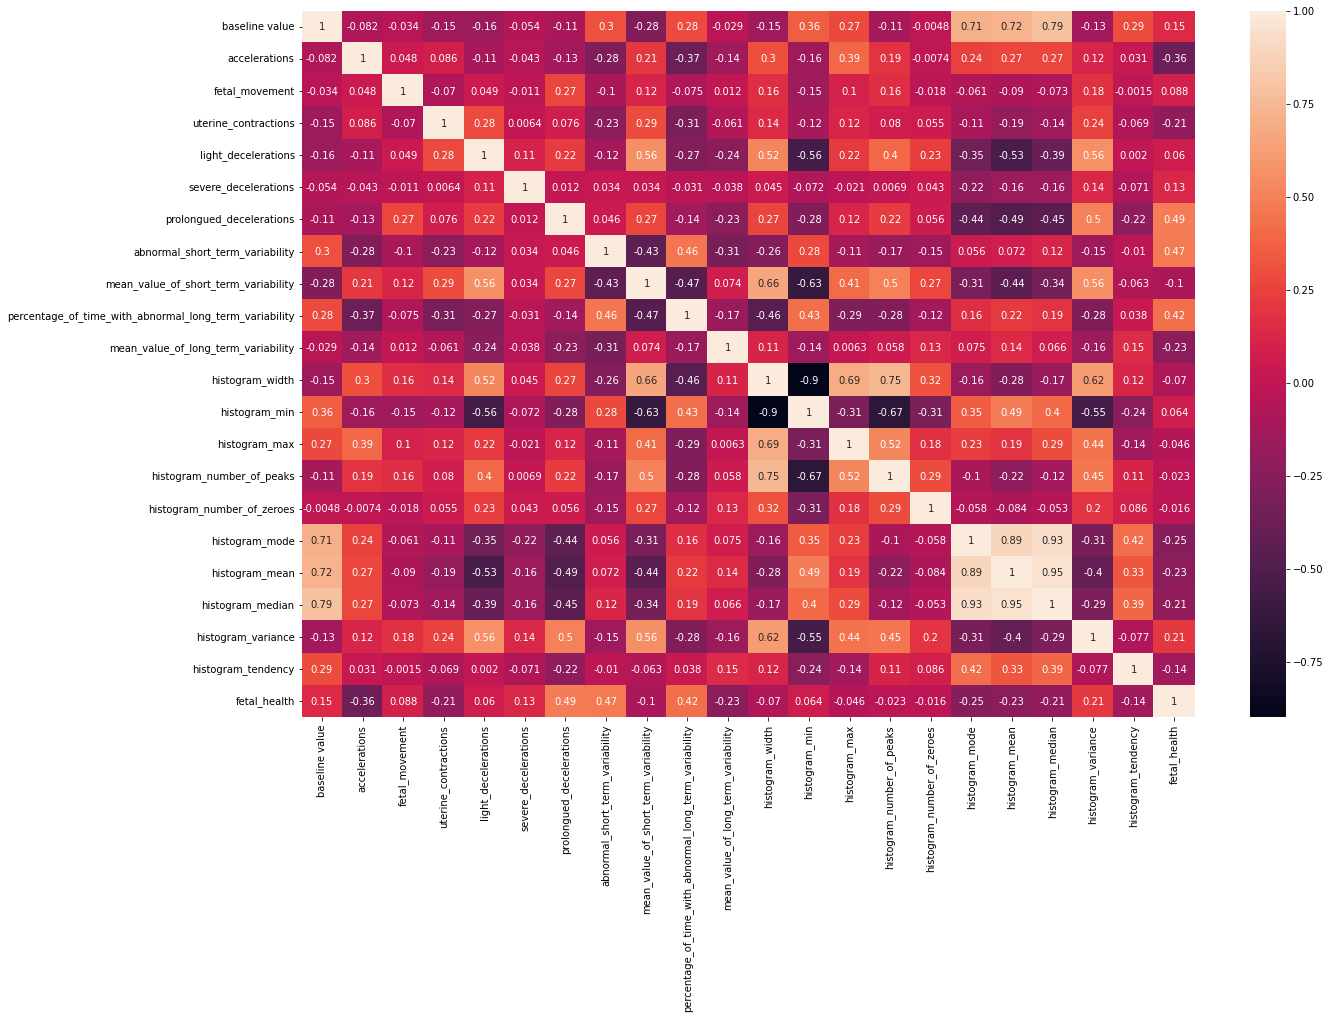

In [12]:
# Heatmap of features
plt.figure(figsize=(20, 13))
sns.heatmap(df.corr(), annot=True)
plt.show()

# histogram mean, histogram mode and histogram median is highly correlated so we can drop any two features.
# base line value and histogram median are higly correlated so we can value of short term variability and light_deceleration are highly correlated
# percentange of time with abnormal long term veriability and abnormal short term variability both are correleted

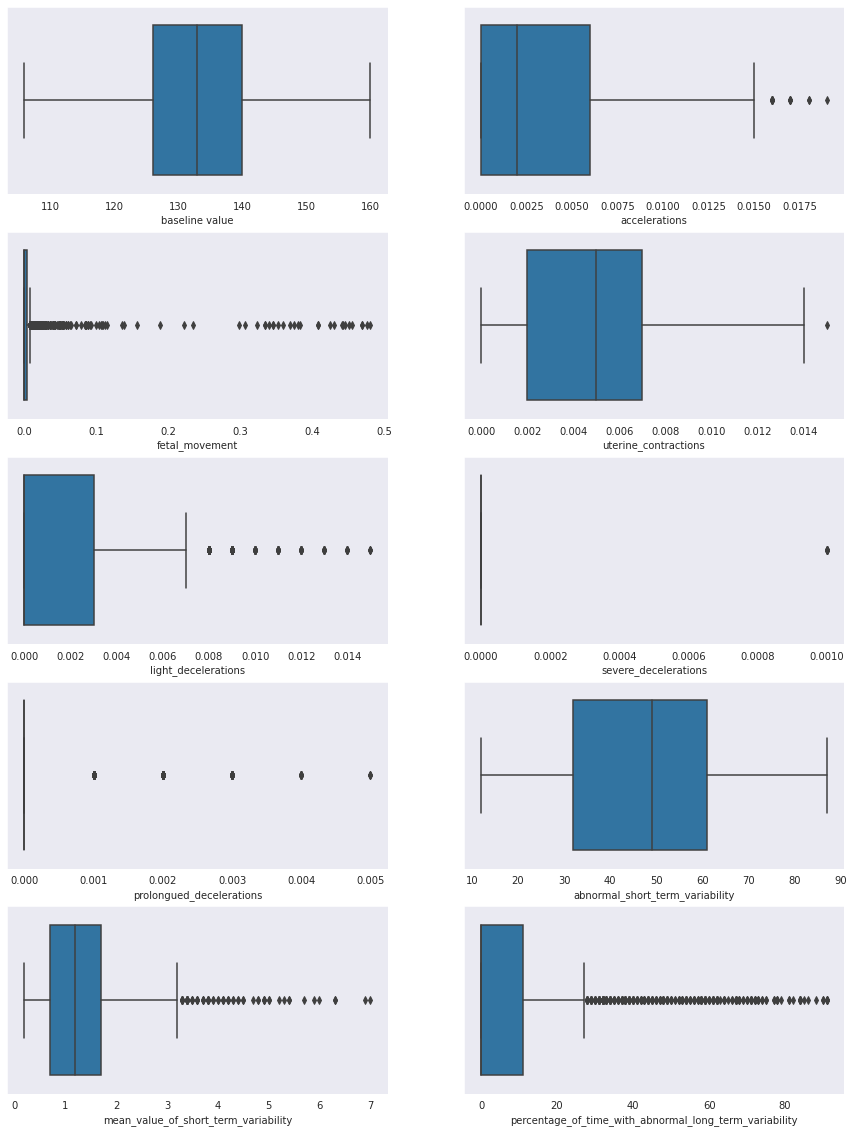

In [61]:
# box plots
fig,ax = plt.subplots(5, 2, figsize=(15, 20))
ax = ax.ravel()
for i in range(10):
  sns.set_style("darkgrid")
  sns.boxplot(df.iloc[:, i], orient='v', ax=ax[i])
plt.show()


## Observation
## only feature baseline_value is normally distributed and all other features are skewed and contains outliers.

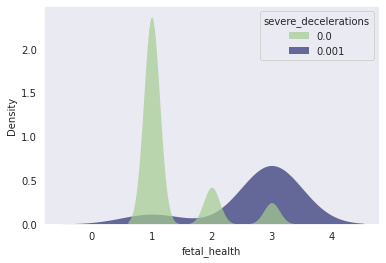

In [14]:
# density plot of fetal health 
sns.kdeplot(data=df, x='fetal_health', hue="severe_decelerations", common_norm=False, fill=True, palette='crest', alpha=0.7, linewidth=0)
plt.grid(False)
plt.show()

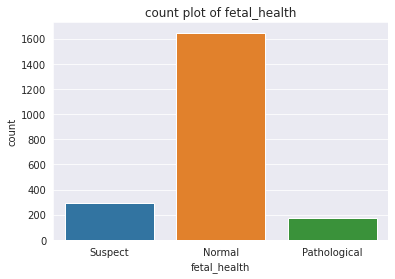

In [15]:
# count plot of labels
temp = df.copy()
temp['fetal_health'] = temp['fetal_health'].replace({1.0: 'Normal', 2.0: 'Suspect', 3.0: 'Pathological'})
sns.countplot(x=temp.fetal_health)
plt.title("count plot of fetal_health")
plt.show()

# data is imbalance as sample for label 2 and 3 are very less compare to label 1

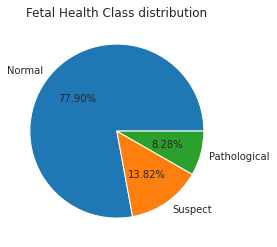

In [16]:
# Pie Chart for target 
plt.pie(df.fetal_health.value_counts(), autopct='%.2f%%', labels=['Normal', 'Suspect', 'Pathological'])
plt.title("Fetal Health Class distribution")
plt.show()

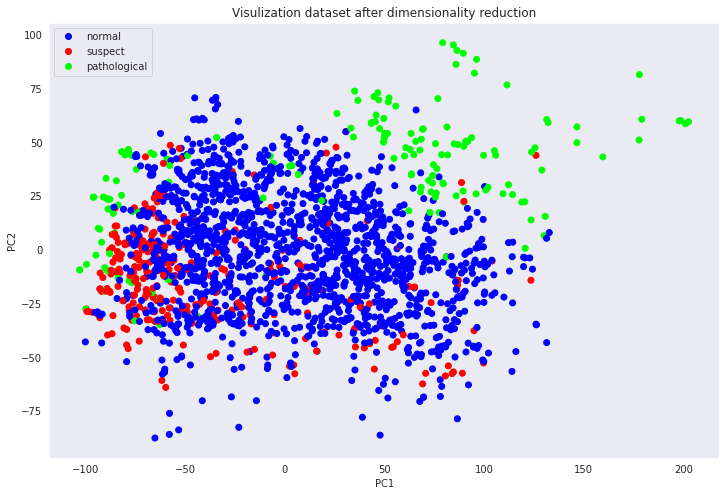

In [60]:
sns.set_style('dark')
plt.figure(figsize=(12, 8))
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df.iloc[:, :-1])
plot = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df['fetal_health'], cmap='brg')
plt.legend(handles=plot.legend_elements()[0], labels=['normal', 'suspect', 'pathological'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visulization dataset after dimensionality reduction")
plt.show()

# Feature Selection

In [18]:
# drop histogram_mode and histogram_mean features

df1 = df.drop(['histogram_mode', 'histogram_mean'], axis=1)
df1.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,138.0,11.0,1.0,1.0


# Scale the data

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df1.iloc[:, :11]), columns=df1.columns[:11])
y = df1.iloc[:, -1]
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability
0,0.259259,0.000000,0.0,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527,0.047337
1,0.481481,0.315789,0.0,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000,0.205128
2,0.500000,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000,0.264300
3,0.518519,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000,0.453649
4,0.481481,0.368421,0.0,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000,0.392505


# Split the data into train and test

In [20]:
# stratify data according to class label to avoid imbalance data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=22, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1690, 11)
(423, 11)
(1690,)
(423,)


# Logistic Regression Model Training

In [21]:
# model without balancing class weights
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_train1 = model1.predict(X_train)
y_pred_test1 = model1.predict(X_test)
print("train accuracy score :", accuracy_score(y_train, y_pred_train1))
print("test accuracy score :", accuracy_score(y_test, y_pred_test1))
print("recall score :", recall_score(y_test, y_pred_test1, average='macro'))
confusion_matrix(y_test, y_pred_test1)

train accuracy score : 0.8928994082840237
test accuracy score : 0.8676122931442081
recall score : 0.6708016121809225


array([[318,  10,   2],
       [ 26,  31,   1],
       [  8,   9,  18]])

In [22]:
# model with balancing class weights
model2 = LogisticRegression(class_weight='balanced')
model2.fit(X_train, y_train)
y_pred_train2 = model2.predict(X_train)
y_pred_test2 = model2.predict(X_test)
print("train accuracy score :", accuracy_score(y_train, y_pred_train2))
print("test accuracy score :", accuracy_score(y_test, y_pred_test2))
print("recall score :", recall_score(y_test, y_pred_test2, average='macro'))
confusion_matrix(y_test, y_pred_test2)

train accuracy score : 0.8420118343195266
test accuracy score : 0.8203309692671394
recall score : 0.8001990346817932


array([[272,  41,  17],
       [  3,  50,   5],
       [  1,   9,  25]])

# Support vector classifier

In [23]:
model3 = SVC(C=50, class_weight='balanced')
model3.fit(X_train, y_train)
y_pred_train3 = model3.predict(X_train)
y_pred_test3 = model3.predict(X_test)
print("train accuracy score :", accuracy_score(y_train, y_pred_train3))
print("test accuracy score :", accuracy_score(y_test, y_pred_test3))
print("recall score :", recall_score(y_test, y_pred_test3, average='macro'))
confusion_matrix(y_test, y_pred_test3)

train accuracy score : 0.9242603550295858
test accuracy score : 0.8912529550827423
recall score : 0.900532417773797


array([[292,  37,   1],
       [  3,  54,   1],
       [  2,   2,  31]])

# KNN Classifier

In [24]:
model4 = KNeighborsClassifier(n_neighbors=5, weights='distance')
model4.fit(X_train, y_train)
y_pred_train4 = model4.predict(X_train)
y_pred_test4 = model4.predict(X_test)
print("train accuracy score :", accuracy_score(y_train, y_pred_train4))
print("test accuracy score :", accuracy_score(y_test, y_pred_test4))
print("recall score :", recall_score(y_test, y_pred_test4, average='macro'))
confusion_matrix(y_test, y_pred_test4)

train accuracy score : 1.0
test accuracy score : 0.9267139479905437
recall score : 0.8730507040851868


array([[316,  13,   1],
       [ 12,  45,   1],
       [  2,   2,  31]])

# Decision Tree Classifier

In [25]:
model5 = DecisionTreeClassifier(random_state=28, max_depth=7, min_samples_split=10)
model5.fit(X_train, y_train)
y_pred_train5 = model5.predict(X_train)
y_pred_test5 = model5.predict(X_test)
print("train accuracy score :", accuracy_score(y_train, y_pred_train5))
print("test accuracy score :", accuracy_score(y_test, y_pred_test5))
print("recall score :", recall_score(y_test, y_pred_test5, average='macro'))
confusion_matrix(y_test, y_pred_test5)

train accuracy score : 0.9491124260355029
test accuracy score : 0.9148936170212766
recall score : 0.7894561377319999


array([[322,   6,   2],
       [ 16,  41,   1],
       [ 10,   1,  24]])

# Random Forest Classifier

In [26]:
model6 = RandomForestClassifier(n_estimators=150, class_weight='balanced', min_samples_leaf=12)
model6.fit(X_train, y_train)
y_pred_train6 = model6.predict(X_train)
y_pred_test6 = model6.predict(X_test)
print("train accuracy score :", accuracy_score(y_train, y_pred_train6))
print("test accuracy score :", accuracy_score(y_test, y_pred_test6))
print("recall score :", recall_score(y_test, y_pred_test6, average='macro'))
confusion_matrix(y_test, y_pred_test6)

train accuracy score : 0.9177514792899408
test accuracy score : 0.900709219858156
recall score : 0.8808876946807981


array([[301,  24,   5],
       [  8,  49,   1],
       [  1,   3,  31]])

# Gradient Boost Classifier

In [27]:
model7 = GradientBoostingClassifier(n_estimators=110, min_samples_leaf=12)
model7.fit(X_train, y_train)
y_pred_train7 = model7.predict(X_train)
y_pred_test7 = model7.predict(X_test)
print("train accuracy score :", accuracy_score(y_train, y_pred_train7))
print("test accuracy score :", accuracy_score(y_test, y_pred_test7))
print("recall score :", recall_score(y_test, y_pred_test7, average='macro'))
confusion_matrix(y_test, y_pred_test7)

train accuracy score : 0.9781065088757397
test accuracy score : 0.9408983451536643
recall score : 0.8781509678061402


array([[323,   6,   1],
       [ 14,  43,   1],
       [  2,   1,  32]])

# Adaboost Classifier

In [28]:
model8 = AdaBoostClassifier(DecisionTreeClassifier(random_state=28, max_depth=7, min_samples_split=10), n_estimators=60, learning_rate=1.5)
model8.fit(X_train, y_train)
y_pred_train8 = model8.predict(X_train)
y_pred_test8 = model8.predict(X_test)
print("train accuracy score :", accuracy_score(y_train, y_pred_train8))
print("test accuracy score :", accuracy_score(y_test, y_pred_test8))
print("recall score :", recall_score(y_test, y_pred_test8, average='macro'))
confusion_matrix(y_test, y_pred_test8)

train accuracy score : 1.0
test accuracy score : 0.9361702127659575
recall score : 0.8600636910981739


array([[322,   8,   0],
       [ 13,  45,   0],
       [  3,   3,  29]])

# Perform grid search on SVM

In [64]:
# Grid Search on SVM
param_grid = {'C': [1, 10, 50, 100, 1000], 'gamma': [0.1, 0.3, 0.01, 0.05, 0.001]}
grid_model = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=2)
grid_model.fit(X_train, y_train)
best = grid_model.best_params_
print(best)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.3; total time=   0.0s
[CV] END .....................................C=1, gamma=0.3; total time=   0.0s
[CV] END .....................................C=1, gamma=0.3; total time=   0.0s
[CV] END .....................................C=1, gamma=0.3; total time=   0.0s
[CV] END .....................................C=1, gamma=0.3; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.1s
[CV] END ....................................C=

## Train model with best params

In [65]:
model9 = SVC(C=1000, gamma=0.3)
model9.fit(X_train, y_train)
y_pred_test9 = model9.predict(X_test)
print("test accuracy score :", accuracy_score(y_test, y_pred_test9))
print("recall score :", recall_score(y_test, y_pred_test9, average='macro'))

test accuracy score : 0.9125295508274232
recall score : 0.8262775538637608


### Using Grid on SVC we get best parameters and we have train SVC on that best params but its not giving good result. so we have finilized earliear svm model as our final model

# SVM Performs best out of all model we have tried.

### SVM recall score is 0.90

## Save model in pickle file  

In [67]:
filename = 'finalmodel.pkl'
pickle.dump(model3, open(filename, 'wb'))

## Reload the saved model


In [79]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.score(X_test, y_test)

0.8912529550827423

# Predict the test examples

In [153]:
model3.predict([[0.1,	0.00,	0.3,	0,	0.4,	0.0,	0.02, 0, 0.8, 0.03, 0]])[0]

1.0

In [154]:
model3.predict([[0.7,	0.0,	0.5,	0.2,	0.4,	0.0,	0.02, 0.5, 0.2, 0.2, 0]])[0]

2.0

In [163]:
model3.predict([[0.3,	0.01,	0,	0.005,	0.05,	0.0,	0, 0.9, 0, 0, 0]])[0]

3.0

# Analysis

### Precision  is our main evaluation metric here because we need less False Negative as less as possible from model prediction.


### Bacause in medical domain problem we need less False Negative as it impact on Fetus health.


### Higher the recall score lower the False Negative and vice-versa.